## TASK 1 : Benzer Özellikteki Günlerin Belirlenmesi

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [159]:
df = pd.read_excel('nisan_ptf_smf_netYon.xlsx',index_col=0)

In [160]:
df.head()

,instrument,ptf,smf,netYon
0,2021-04-01 00:00,"234,43","263,43",304.476
1,2021-04-01 01:00,"310,02","344,02",942.555
2,2021-04-01 02:00,"256,99","285,99",533.836
3,2021-04-01 03:00,"238,88","267,88",296.610
4,2021-04-01 04:00,"234,87","259,80",251.892


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instrument  720 non-null    object 
 1   ptf         720 non-null    object 
 2   smf         720 non-null    object 
 3   netYon      720 non-null    float64
dtypes: float64(1), object(3)
memory usage: 28.1+ KB


In [162]:
df.isnull().sum()

instrument    0
ptf           0
smf           0
netYon        0
dtype: int64

In [163]:
import time
import datetime as dt

In [164]:
df['instrument'] = pd.to_datetime(df['instrument'])

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instrument  720 non-null    datetime64[ns]
 1   ptf         720 non-null    object        
 2   smf         720 non-null    object        
 3   netYon      720 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 28.1+ KB


In [166]:
df['day'] = df['instrument'].dt.day

In [167]:
df.head(2)

,instrument,ptf,smf,netYon,day
0,2021-04-01 00:00:00,"234,43","263,43",304.476,1
1,2021-04-01 01:00:00,"310,02","344,02",942.555,1


In [168]:
df = df.set_index('instrument')

In [169]:
df.head()

,ptf,smf,netYon,day
instrument,,,,
2021-04-01 00:00:00,"234,43","263,43",304.476,1
2021-04-01 01:00:00,"310,02","344,02",942.555,1
2021-04-01 02:00:00,"256,99","285,99",533.836,1
2021-04-01 03:00:00,"238,88","267,88",296.610,1
2021-04-01 04:00:00,"234,87","259,80",251.892,1


In [170]:
df.describe()

,netYon,day
count,720.000000,720.000000
mean,305.417740,15.500000
std,973.042668,8.661458
min,-2346.191000,1.000000
25%,-319.797500,8.000000
50%,315.549500,15.500000
75%,844.952000,23.000000
max,3880.313000,30.000000


In [171]:
df['ptf'] = df['ptf'].str.replace(',', '.')

In [172]:
df['smf'] = df['smf'].str.replace(',', '.')

In [173]:
df.head()

,ptf,smf,netYon,day
instrument,,,,
2021-04-01 00:00:00,234.43,263.43,304.476,1
2021-04-01 01:00:00,310.02,344.02,942.555,1
2021-04-01 02:00:00,256.99,285.99,533.836,1
2021-04-01 03:00:00,238.88,267.88,296.610,1
2021-04-01 04:00:00,234.87,259.80,251.892,1


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720 entries, 2021-04-01 00:00:00 to 2021-04-30 23:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ptf     720 non-null    object 
 1   smf     720 non-null    object 
 2   netYon  720 non-null    float64
 3   day     720 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 28.1+ KB


In [175]:
df['ptf'] = df['ptf'].astype('float64')

In [176]:
df['smf'] = df['smf'].astype('float64')

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720 entries, 2021-04-01 00:00:00 to 2021-04-30 23:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ptf     720 non-null    float64
 1   smf     720 non-null    float64
 2   netYon  720 non-null    float64
 3   day     720 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 28.1 KB


In [178]:
df.describe()

,ptf,smf,netYon,day
count,720.000000,720.000000,720.000000,720.000000
mean,312.149556,311.430694,305.417740,15.500000
std,55.932110,84.217111,973.042668,8.661458
min,15.400000,1.990000,-2346.191000,1.000000
25%,310.777500,275.750000,-319.797500,8.000000
50%,319.315000,330.005000,315.549500,15.500000
75%,327.272500,358.005000,844.952000,23.000000
max,567.000000,567.000000,3880.313000,30.000000


In [179]:
df.corr()

,ptf,smf,netYon,day
ptf,1.000000,0.615292,0.056469,0.374004
smf,0.615292,1.000000,0.745765,0.175365
netYon,0.056469,0.745765,1.000000,-0.182008
day,0.374004,0.175365,-0.182008,1.000000


<AxesSubplot:>

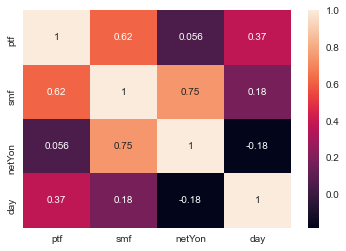

In [180]:
sns.heatmap(df.corr(), annot=True)

* <b> smf </b> ile <b>netYon</b> arasında güçlü bir ilişki var. İkisi <b>0.75</b> lik bir korelasyona sahip.
* <b>ptf</b> ile <b>smf</b> arasında <b>0.62</b> lik bir korelasyon var.
* <b>day</b> ile en güçlü korelasyon <b>ptf</b> ile <b>0.37</b> lik, daha sonra smf ile de <b>0.18</b> lik bir pozitif ilişki vardır.

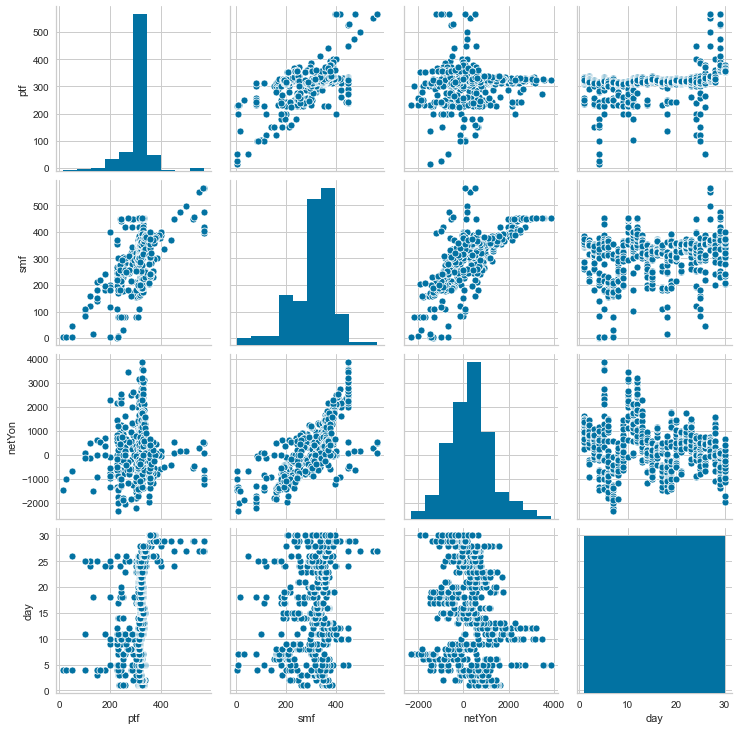

In [181]:
sns.pairplot(df)
plt.show()

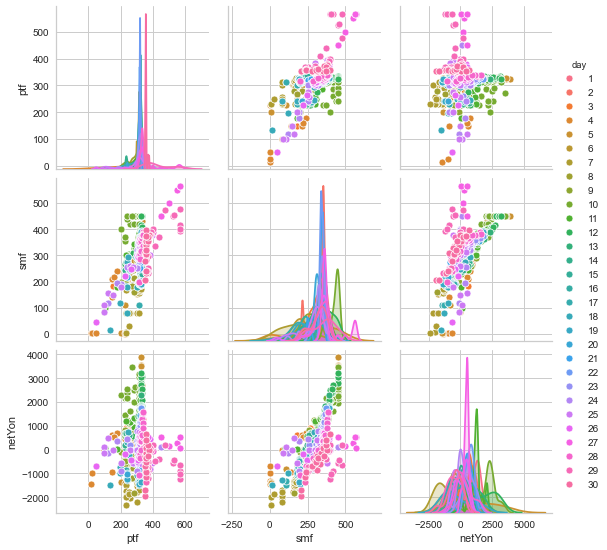

In [182]:
sns.pairplot(df, hue='day');

In [183]:
df.netYon.value_counts()

 0.000       12
-274.000      2
 70.654       1
-541.031      1
 667.069      1
             ..
-1001.627     1
 2502.720     1
 328.826      1
-551.962      1
-216.327      1
Name: netYon, Length: 708, dtype: int64

<AxesSubplot:xlabel='netYon'>

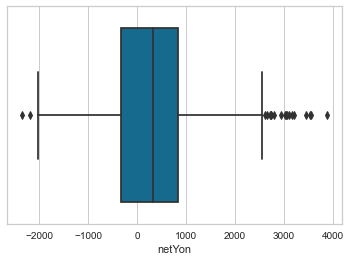

In [184]:
sns.boxplot(df.netYon)

In [185]:
df.ptf.value_counts()

300.01    10
567.00     6
300.00     6
227.99     5
241.10     5
          ..
321.36     1
311.51     1
320.92     1
99.99      1
269.41     1
Name: ptf, Length: 604, dtype: int64

<AxesSubplot:xlabel='ptf'>

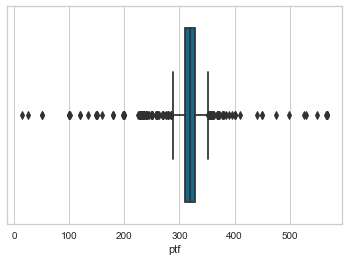

In [186]:
sns.boxplot(df.ptf)

In [187]:
df.smf.value_counts()

349.99    11
340.00     9
350.00     9
450.00     9
354.99     8
          ..
354.53     1
360.72     1
378.54     1
363.53     1
311.44     1
Name: smf, Length: 557, dtype: int64

<AxesSubplot:xlabel='smf'>

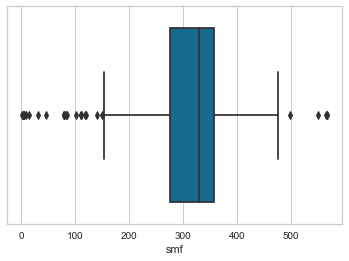

In [188]:
sns.boxplot(df.smf)

In [189]:
from sklearn.preprocessing import StandardScaler

In [190]:
scaler = StandardScaler()
df_scale = scaler.fit_transform(df)

In [191]:
df_scale = pd.DataFrame(df_scale)
df_scale.columns = df.columns

In [192]:
df.describe()

,ptf,smf,netYon,day
count,720.000000,720.000000,720.000000,720.000000
mean,312.149556,311.430694,305.417740,15.500000
std,55.932110,84.217111,973.042668,8.661458
min,15.400000,1.990000,-2346.191000,1.000000
25%,310.777500,275.750000,-319.797500,8.000000
50%,319.315000,330.005000,315.549500,15.500000
75%,327.272500,358.005000,844.952000,23.000000
max,567.000000,567.000000,3880.313000,30.000000


In [193]:
df_scale.describe()

,ptf,smf,netYon,day
count,7.200000e+02,7.200000e+02,7.200000e+02,7.200000e+02
mean,8.110796e-17,-1.480297e-17,-3.257425e-18,1.356939e-17
std,1.000695e+00,1.000695e+00,1.000695e+00,1.000695e+00
min,-5.309219e+00,-3.676875e+00,-2.726964e+00,-1.675247e+00
25%,-2.454778e-02,-4.239696e-01,-6.429830e-01,-8.665069e-01
50%,1.281987e-01,2.207060e-01,1.041969e-02,0.000000e+00
75%,2.705683e-01,5.534111e-01,5.548671e-01,8.665069e-01
max,4.559592e+00,3.036758e+00,3.676489e+00,1.675247e+00


In [194]:
# pip install pyclustertend

from pyclustertend import hopkins

In [195]:
hopkins(df_scale, df_scale.shape[0])

0.07732264790464968

* Clustere yatkın diyebiliriz. Meyil sıfıra doğru,sıfıra yakın

# Elbow Method

Bununla kaç cluster a ayıracağımıza karar veriyoruz.

In [196]:
from sklearn.cluster import KMeans

In [197]:
ssd = []

K = range(1,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df_scale)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Method')

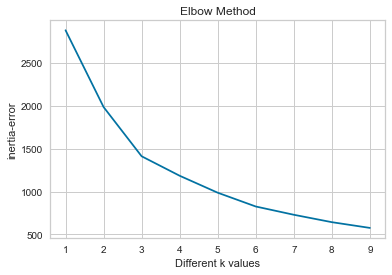

In [198]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")

In [199]:
# Olay MİNİMUM CLUSTER ile MAKSİMUM AYRIMI yapamk
# Minimum Cluster ile optimal hatayı bulmak
# Burada 3 en uygun olandır
# yani herbir veri noktasının merkeze uzaklıklarının karesi, bu hataların karesi oluyor. inertia_

In [200]:
# yellowbrick tarafındanda yapıldığını gösteriyoruz
from yellowbrick.cluster import KElbowVisualizer

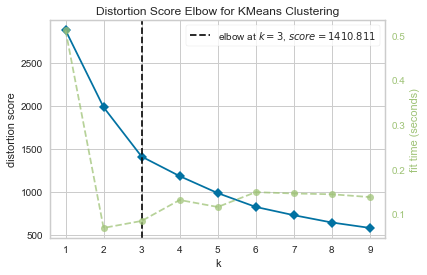

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [201]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,10))
visu.fit(df_scale)
visu.poof()

In [202]:
model = KMeans(n_clusters = 3)  # 3 ya da 4 cluster uygun görünüyor
model.fit(df_scale)
model

KMeans(n_clusters=3)

In [203]:
model.inertia_

1410.8113013256475

In [204]:
model.labels_

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,

In [205]:
clusters = model.labels_

In [206]:
df.head()

,ptf,smf,netYon,day
instrument,,,,
2021-04-01 00:00:00,234.43,263.43,304.476,1
2021-04-01 01:00:00,310.02,344.02,942.555,1
2021-04-01 02:00:00,256.99,285.99,533.836,1
2021-04-01 03:00:00,238.88,267.88,296.610,1
2021-04-01 04:00:00,234.87,259.80,251.892,1


In [207]:
df['predicted_clusters'] = clusters

In [208]:
df['predicted_clusters'].value_counts()

2    333
1    234
0    153
Name: predicted_clusters, dtype: int64

<AxesSubplot:title={'center':'clusters with the number of customers'}, xlabel='clusters', ylabel='Count'>

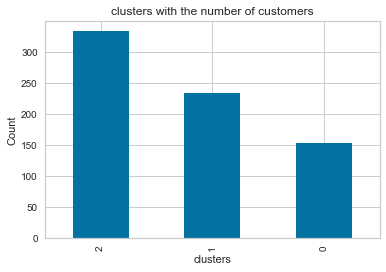

In [209]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
df.predicted_clusters.value_counts().plot(kind='bar')

In [210]:
df_scale.head()

,ptf,smf,netYon,day
0,-1.390500,-0.570360,-0.000969,-1.675247
1,-0.038100,0.387237,0.655244,-1.675247
2,-0.986873,-0.302295,0.234910,-1.675247
3,-1.310884,-0.517484,-0.009058,-1.675247
4,-1.382628,-0.613493,-0.055047,-1.675247


In [211]:
df.sample(5)

,ptf,smf,netYon,day,predicted_clusters
instrument,,,,,
2021-04-26 16:00:00,335.23,355.23,498.297,26,2
2021-04-04 01:00:00,314.41,314.41,-17.900,4,1
2021-04-30 04:00:00,355.12,330.12,-613.908,30,2
2021-04-11 02:00:00,314.65,356.65,1320.083,11,1
2021-04-02 14:00:00,329.84,350.00,688.868,2,1


In [212]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [213]:
print(f'Silhouette Score(n=3): {silhouette_score(df_scale, clusters)}')

Silhouette Score(n=3): 0.35250848308474564


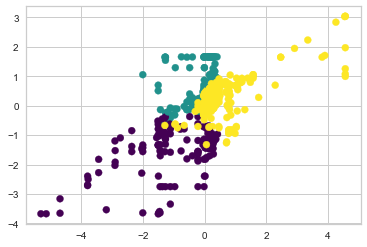

In [214]:
plt.scatter(df_scale.iloc[:,0],df_scale.iloc[:,1],c=clusters,cmap="viridis")

In [215]:
model.cluster_centers_

array([[-0.92523026, -1.49977835, -1.02730352, -0.5153734 ],
       [-0.04697339,  0.56477597,  0.8905828 , -0.88033154],
       [ 0.45811413,  0.29221775, -0.15381062,  0.85540454]])

In [216]:
centers = model.cluster_centers_

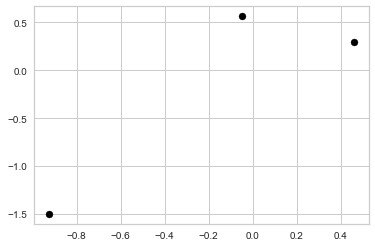

In [217]:
plt.scatter(centers[:,0], centers[:,1], c="black")

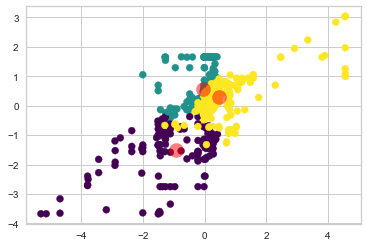

In [218]:
plt.scatter(df_scale.iloc[:,0],df_scale.iloc[:,1],c=clusters,cmap="viridis")
plt.scatter(centers[:,0], centers[:,1], c="red", s=200, alpha=0.5)

## n_clusters = 4 için

In [219]:
model = KMeans(n_clusters = 4)
model.fit(df_scale)
model

KMeans(n_clusters=4)

In [220]:
model.inertia_

1183.8373368766147

In [221]:
model.labels_

array([2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [222]:
clusters = model.labels_

In [223]:
df.head()

,ptf,smf,netYon,day,predicted_clusters
instrument,,,,,
2021-04-01 00:00:00,234.43,263.43,304.476,1,0
2021-04-01 01:00:00,310.02,344.02,942.555,1,1
2021-04-01 02:00:00,256.99,285.99,533.836,1,1
2021-04-01 03:00:00,238.88,267.88,296.610,1,0
2021-04-01 04:00:00,234.87,259.80,251.892,1,0


In [224]:
df['predicted_clusters'] = clusters

In [225]:
df['predicted_clusters'].value_counts()

0    322
1    235
2    148
3     15
Name: predicted_clusters, dtype: int64

<AxesSubplot:title={'center':'clusters with the number of customers'}, xlabel='clusters', ylabel='Count'>

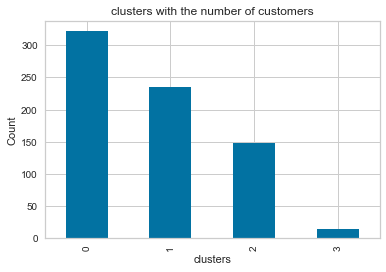

In [226]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
df.predicted_clusters.value_counts().plot(kind='bar')

In [227]:
df_scale.head()

,ptf,smf,netYon,day
0,-1.390500,-0.570360,-0.000969,-1.675247
1,-0.038100,0.387237,0.655244,-1.675247
2,-0.986873,-0.302295,0.234910,-1.675247
3,-1.310884,-0.517484,-0.009058,-1.675247
4,-1.382628,-0.613493,-0.055047,-1.675247


In [228]:
df.sample(5)

,ptf,smf,netYon,day,predicted_clusters
instrument,,,,,
2021-04-21 15:00:00,317.73,341.73,510.240,21,0
2021-04-27 22:00:00,499.04,499.04,165.667,27,3
2021-04-22 10:00:00,319.95,349.95,776.155,22,0
2021-04-18 08:00:00,198.11,118.49,-975.253,18,2
2021-04-17 08:00:00,313.00,110.00,-1320.254,17,2


In [229]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [230]:
print(f'Silhouette Score(n=4): {silhouette_score(df_scale, clusters)}')

Silhouette Score(n=4): 0.36932347695421325


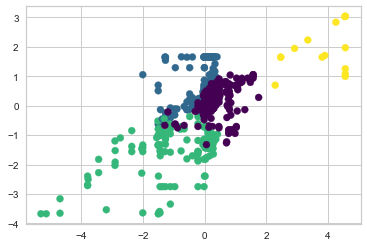

In [231]:
plt.scatter(df_scale.iloc[:,0],df_scale.iloc[:,1],c=clusters,cmap="viridis")

In [232]:
model.cluster_centers_

array([[ 0.29339661,  0.21240013, -0.13427209,  0.81770985],
       [-0.0607355 ,  0.55345987,  0.88475204, -0.8856807 ],
       [-0.92931296, -1.53511163, -1.06133117, -0.51756225],
       [ 3.82249664,  1.91604057, -0.50694017,  1.42877365]])

In [233]:
centers = model.cluster_centers_

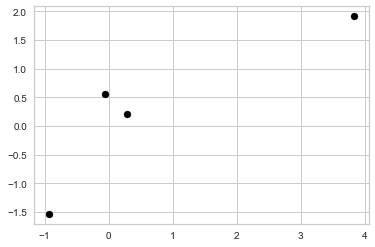

In [234]:
plt.scatter(centers[:,0], centers[:,1], c="black")

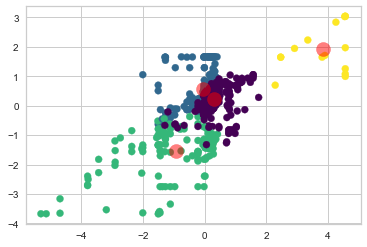

In [235]:
plt.scatter(df_scale.iloc[:,0],df_scale.iloc[:,1],c=clusters,cmap="viridis")
plt.scatter(centers[:,0], centers[:,1], c="red", s=200, alpha=0.5)

## Conclusion

1) Unspupervised Learning algoritmalarından biri olan K-Means Clustering algoritmasını kullandım. Benzer özelliğe sahip olanları kümelesin diye bu algoritmayı seçtim.

2) Model oncesinde model inertia degerlerine bakiyoruz. Minimum inertia degerinin oldugu minimum k degerini tespit etmeye calisiyoruz. Bu bizim optimal k degerimizdir.

3) Model bittikten sonra ise modelimizin sundugu label degerlerini ve centroidleri ayni grafikte birlestirip cluster lari fark edebiliriz.

4) Biz burada verileri 3 ve 4 kümelemeye ayırdık ve her iki kümelemeyi de ayrı ayrı gösterdik.